# EcoOpt: Global Energy Sustainability Analysis and Optimization

**Dataset Description:**

Uncover this comprehensive dataset showcasing sustainable energy indicators and other useful factors across all countries from 2000 to 2020. Dive into vital aspects such as electricity access, renewable energy, carbon emissions, energy intensity, Financial flows, and economic growth. Compare nations, track progress towards Sustainable Development Goal 7, and gain profound insights into global energy consumption patterns over time.

**Key Features:**

Entity: The name of the country or region for which the data is reported.

Year: The year for which the data is reported, ranging from 2000 to 2020.

Access to electricity: The percentage of population with access to electricity.

Access to clean fuels for cooking: The percentage of the population with primary reliance on clean fuels.

Renewable-electricity-generating-capacity-per-capita: Installed Renewable energy capacity per person.

Financial flows to developing countries: Aid and assistance from developed countries for clean energy projects.

Renewable energy share in total final energy consumption: Percentage of renewable energy in final energy consumption.

Electricity from fossil fuels: Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.

Electricity from nuclear: Electricity generated from nuclear power in terawatt-hours.

Electricity from renewables: Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.

Low-carbon electricity: Percentage of electricity from low-carbon sources (nuclear and renewables).

Primary energy consumption per capita: Energy consumption per person in kilowatt-hours.

Energy intensity level of primary energy: Energy use per unit of GDP at purchasing power parity.

Value_co2_emissions (metric tons per capita): Carbon dioxide emissions per person in metric tons.

Renewables: Equivalent primary energy that is derived from renewable sources.

GDP growth: Annual GDP growth rate based on constant local currency.

GDP per capita: Gross domestic product per person.

Density: Population density in persons per square kilometer.

Land Area: Total land area in square kilometers.

Latitude: Latitude of the country's centroid in decimal degrees.

Longitude: Longitude of the country's centroid in decimal degrees.

**Potential Use cases:**

Energy Consumption Prediction: Predict future energy usage, aid planning, and track SDG 7 progress.

Carbon Emission Forecasting: Forecast CO2 emissions, support climate strategies.

Energy Access Classification: Categorize regions for infrastructure development, understand sustainable energy's role.

Sustainable Development Goal Tracking: Monitor progress towards Goal 7, evaluate policy impact.

Energy Equity Analysis: Analyze access, density, and growth for equitable distribution.

Energy Efficiency Optimization: Identify intensive areas for environmental impact reduction.

Renewable Energy Potential Assessment: Identify regions for green investments based on capacity.

Renewable Energy Investment Strategies: Guide investors towards sustainable opportunities.


## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: Yellow; font-size:100%; text-align:center; color: red;">Start</div>

## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #0000FF; font-size:100%; text-align:center; color: white;">1. Import Libraries</div>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
import plotly.graph_objects as go
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MaxAbsScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #0000FF; font-size:100%; text-align:center; color: white;">2. Loading Dataset</div>

In [2]:
# Loading Dataset
df = pd.read_csv('/kaggle/input/global-data-on-sustainable-energy/global-data-on-sustainable-energy (1).csv')
print(df.head())  # Display a sample of the data

        Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial 

## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #0000FF; font-size:100%; text-align:center; color: white;">3. Dynamic world map with a slider</div>

In [3]:
# Dynamic world map with a slider
def plot_world_map_with_slider(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        filtered_df = df[df['Year'] == year]
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False
        )
        fig.add_trace(trace)

    fig.data[0].visible = True
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)
        )
        step['args'][0]['visible'][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},
    )]

    fig.update_layout(
        title_text=f'{column_name} Map with slider',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50),
    )
    fig.show()

# Example usage
column_name = 'Access to electricity (% of population)'
plot_world_map_with_slider(column_name)
column_name = 'Renewable energy share in the total final energy consumption (%)'
plot_world_map_with_slider(column_name)

## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #0000FF; font-size:100%; text-align:center; color: white;">4. EDA</div>

In [4]:
# Filtering numerical data
numeric_data = df.select_dtypes(include='number')
# Filtering categorical data
categorical_data = df.select_dtypes(exclude='number')

In [5]:
# Describe dataset and show missing values
df_info = df.describe().transpose()
missing_values = df.isna().sum()

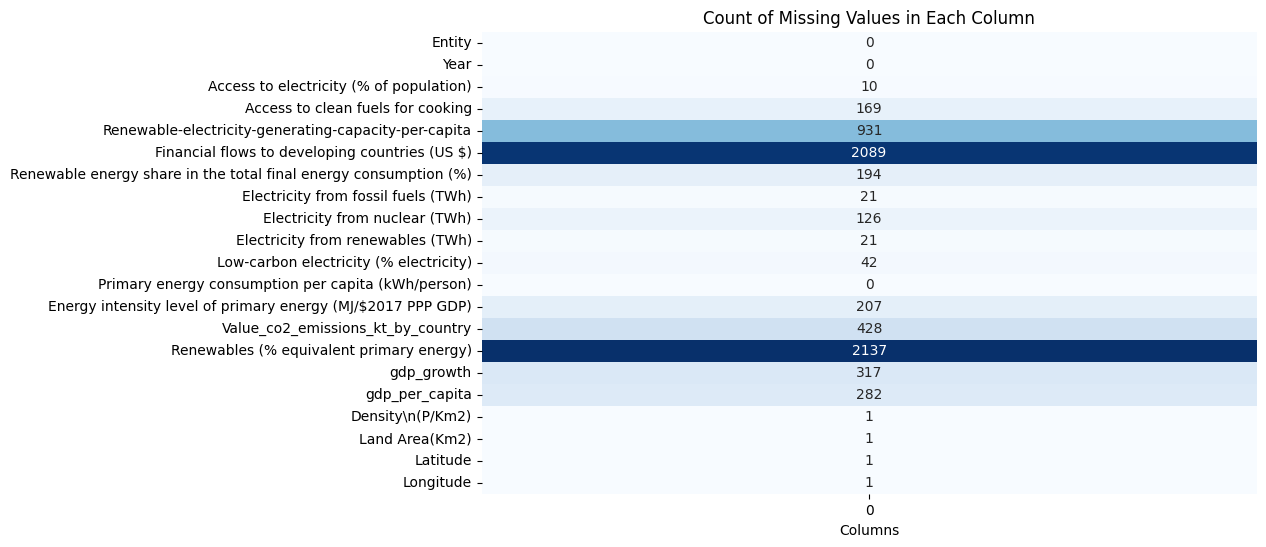

In [6]:
# Create a heatmap
fig_missing_values = plt.figure(figsize=(10, 6))
sns.heatmap(missing_values.to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)
# Customize the chart
plt.title('Count of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('')
# Display the chart
plt.show()

In [7]:
# Drop columns with a high number of missing values
df.drop(columns=['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)',
                 'Renewable-electricity-generating-capacity-per-capita'], inplace=True)

In [8]:
# Fill missing values with mean
columns_to_fill_mean = ['Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)',
                        'Electricity from nuclear (TWh)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                        'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita']
df[columns_to_fill_mean] = df[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))

In [9]:
# Drop remaining rows with missing values
df = df.dropna()

In [10]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [11]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Display the correlation matrix
print(correlation_matrix)

                                                        Year  \
Year                                                1.000000   
Access to electricity (% of population)             0.125712   
Access to clean fuels for cooking                   0.064450   
Renewable energy share in the total final energ... -0.023255   
Electricity from fossil fuels (TWh)                 0.032060   
Electricity from nuclear (TWh)                     -0.005461   
Electricity from renewables (TWh)                   0.073513   
Low-carbon electricity (% electricity)              0.026373   
Primary energy consumption per capita (kWh/person)  0.001562   
Energy intensity level of primary energy (MJ/$2... -0.146092   
Value_co2_emissions_kt_by_country                   0.021141   
gdp_growth                                         -0.187968   
gdp_per_capita                                      0.131025   
Land Area(Km2)                                     -0.002763   
Latitude                                

In [12]:
df.isna().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                                      0
Density\n(P/Km2)    

# Install or upgrade Plotly

In [13]:
pip install plotly --upgrade

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/0b/f8/b65cdd2be32e442c4efe7b672f73c90b05eab5a7f3f4115efe181d432c60/plotly-5.22.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.16.1
    Uninstalling plotly-5.16.1:
      Successfully uninstalled plotly-5.16.1
Note: you may need to restart the kernel to use updated packages.


In [14]:
print(missing_values)

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [15]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [16]:
# Temporary suppression of the warning
pd.set_option('mode.chained_assignment', None)

In [17]:
# Calculate mean for specific columns
Mean_Access = df['Access to clean fuels for cooking'].mean()
Mean_Renewable = df['Renewable energy share in the total final energy consumption (%)'].mean()
Mean_Electricity = df['Electricity from nuclear (TWh)'].mean()
Mean_Energy = df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean()
Mean_Value_co2 = df['Value_co2_emissions_kt_by_country'].mean()
Mean_gdp_growth = df['gdp_growth'].mean()
Mean_gdp_per_capita = df['gdp_per_capita'].mean()

# Fill missing values in specific columns with calculated means
df['Access to clean fuels for cooking'] = df['Access to clean fuels for cooking'].fillna(Mean_Access)
df['Renewable energy share in the total final energy consumption (%)'] = df['Renewable energy share in the total final energy consumption (%)'].fillna(Mean_Renewable)
df['Electricity from nuclear (TWh)'] = df['Electricity from nuclear (TWh)'].fillna(Mean_Electricity)
df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'] = df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(Mean_Energy)
df['Value_co2_emissions_kt_by_country'] = df['Value_co2_emissions_kt_by_country'].fillna(Mean_Value_co2)
df['gdp_growth'] = df['gdp_growth'].fillna(Mean_gdp_growth)
df['gdp_per_capita'] = df['gdp_per_capita'].fillna(Mean_gdp_per_capita)

# Drop rows with any remaining missing values
df = df.dropna().copy()  # Use copy() to avoid SettingWithCopyWarning
# Display the shape of the DataFrame after cleaning
print(df.shape)
# Reset the warning mode to the default
pd.set_option('mode.chained_assignment', 'warn')

(3597, 18)


In [18]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]
# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [Entity, Year, Access to electricity (% of population), Access to clean fuels for cooking, Renewable energy share in the total final energy consumption (%), Electricity from fossil fuels (TWh), Electricity from nuclear (TWh), Electricity from renewables (TWh), Low-carbon electricity (% electricity), Primary energy consumption per capita (kWh/person), Energy intensity level of primary energy (MJ/$2017 PPP GDP), Value_co2_emissions_kt_by_country, gdp_growth, gdp_per_capita, Density\n(P/Km2), Land Area(Km2), Latitude, Longitude]
Index: []


In [19]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df_copy = df.copy()
# Rename columns in the copied DataFrame
df_copy.rename(columns={"Value_co2_emissions_kt_by_country": "CO2", 'Land Area(Km2)': 'Land'}, inplace=True)

In [20]:
# Rename the 'Density' column
df.rename(columns={'Density\\n(P/Km2)': 'Density'}, inplace=True)
# Convert 'Density' to string and then replace commas and convert to integer using .loc
df.loc[:, 'Density'] = df['Density'].astype(str).str.replace(',', '').astype(int)

In [21]:
print(df.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')


## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #0000FF; font-size:100%; text-align:center; color: white;">5. Visualization</div>

In [22]:
# Selecting specific columns 'Entity' and 'Land Area(Km2)' into a new DataFrame
energy_land = df[['Entity', 'Land Area(Km2)']]

# Dropping rows with missing values in the selected columns
energy_land = energy_land.dropna()

# Getting unique country names from the 'Entity' column
countries = energy_land['Entity'].unique()

# Getting unique land area values from the 'Land Area(Km2)' column
land = energy_land['Land Area(Km2)'].unique()

# Clean the land area values by converting to integers
land_int = []
for num in land:
    if isinstance(num, float):
        land_int.append(int(num))
    else:
        land_int.append(int(str(num).replace(',', '')))

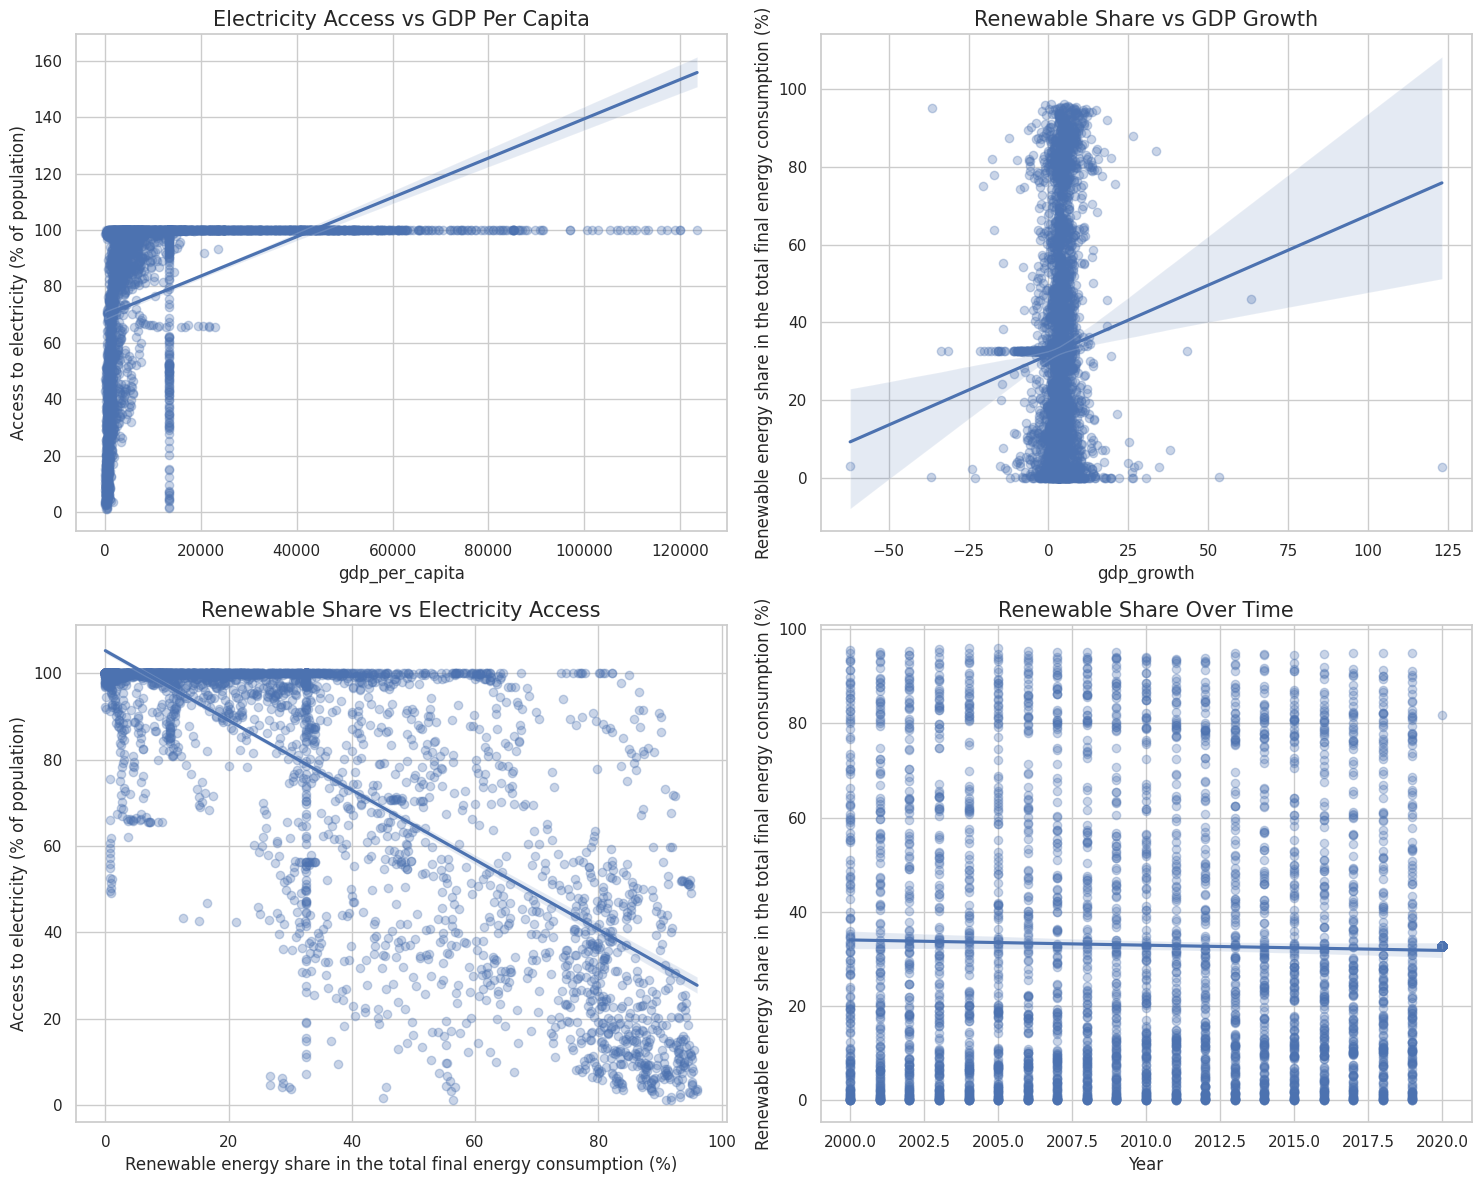

In [23]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Define the columns and titles for the visualizations
columns = [
    ('gdp_per_capita', 'Access to electricity (% of population)', 'Electricity Access vs GDP Per Capita'),
    ('gdp_growth', 'Renewable energy share in the total final energy consumption (%)', 'Renewable Share vs GDP Growth'),
    ('Renewable energy share in the total final energy consumption (%)', 'Access to electricity (% of population)', 'Renewable Share vs Electricity Access'),
    ('Year', 'Renewable energy share in the total final energy consumption (%)', 'Renewable Share Over Time')
]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through the columns and plot the visualizations
for i, (x_col, y_col, title) in enumerate(columns):
    plt.subplot(2, 2, i + 1)  # Use 2 rows and 2 columns

    if 'Year' in title:
        sns.lineplot(x=x_col, y=y_col, data=df, ax=axes[i])
    else:
        sns.regplot(x=x_col, y=y_col, data=df, scatter_kws={'alpha': 0.3}, ax=axes[i])

    plt.title(title, size=15)
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

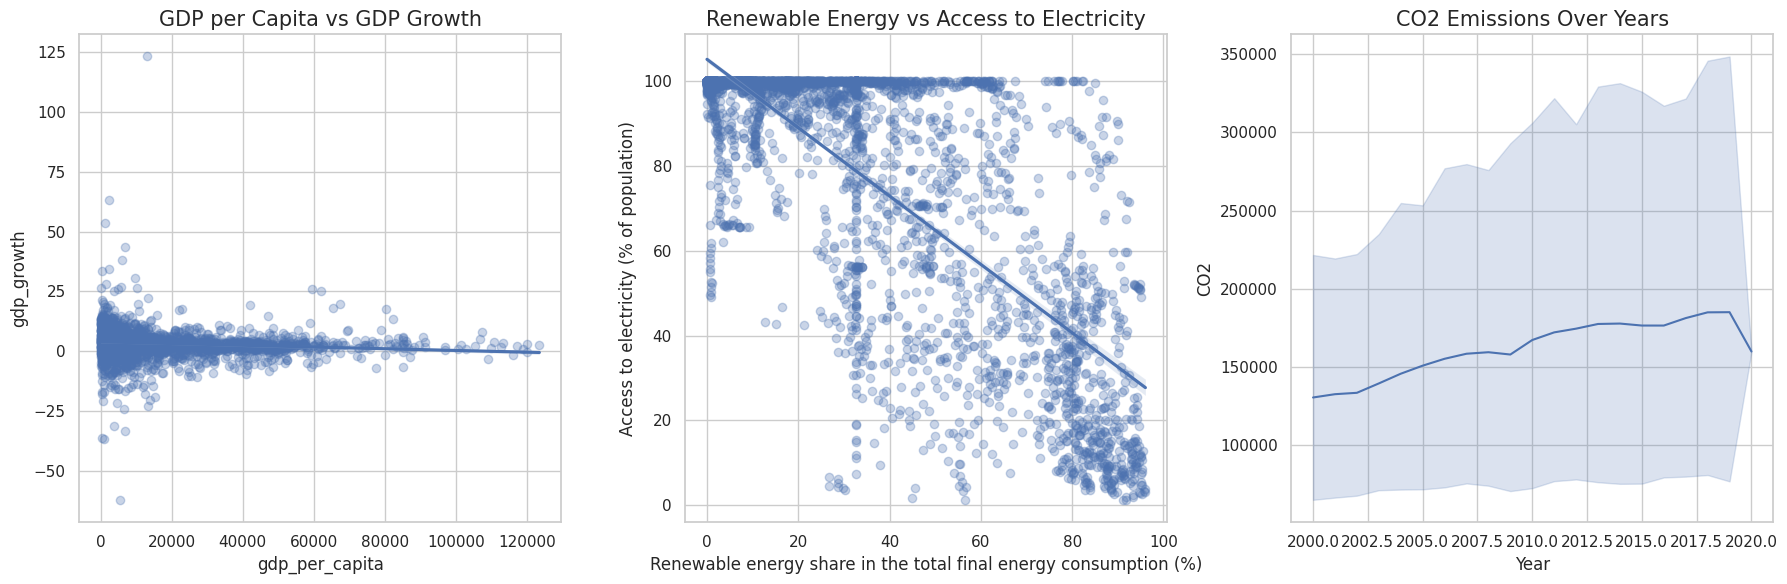

In [24]:
# Create a copy of the DataFrame
df_copy = df.rename(columns={"Value_co2_emissions_kt_by_country": "CO2", 'Land Area(Km2)': 'Land'})
# Select specific columns for visualization
columns_for_visualization = [('gdp_per_capita', 'gdp_growth', 'GDP per Capita vs GDP Growth'),
                              ('Renewable energy share in the total final energy consumption (%)', 'Access to electricity (% of population)', 'Renewable Energy vs Access to Electricity'),
                              ('Year', 'CO2', 'CO2 Emissions Over Years')]
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()
# Titles of the visualizations to be displayed
selected_titles = ['GDP per Capita vs GDP Growth', 'Renewable Energy vs Access to Electricity', 'CO2 Emissions Over Years']
# Iterate through the columns and plot the selected visualizations
for i, (x_col, y_col, title) in enumerate(columns_for_visualization):
    if title not in selected_titles:
        continue
    plt.subplot(1, 3, selected_titles.index(title) + 1)
    if 'Year' in title:
        sns.lineplot(x=x_col, y=y_col, data=df_copy, ax=axes[selected_titles.index(title)])
    else:
        sns.regplot(x=x_col, y=y_col, data=df_copy, scatter_kws={'alpha': 0.3}, ax=axes[selected_titles.index(title)])
    plt.title(title, size=15)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #0000FF; font-size:100%; text-align:center; color: white;">6. Correlation</div>

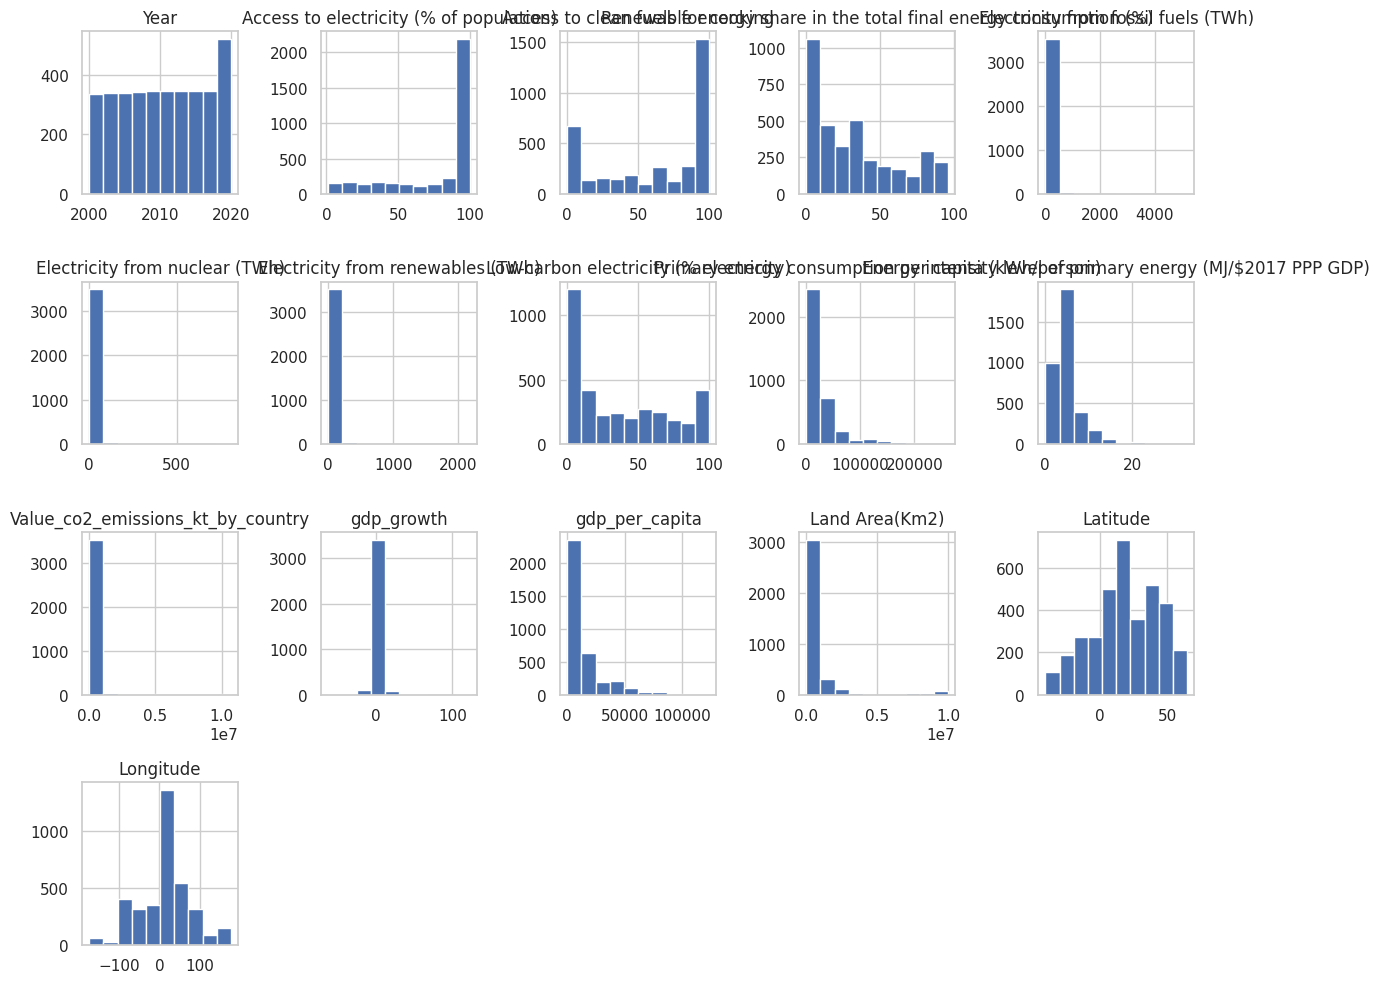

In [25]:
# Visualize histograms for each numerical column
df.hist(figsize=(12, 10), layout=(4, 5))  # Adjust layout based on the number of columns
plt.tight_layout()  # Adjust padding to prevent overlap
plt.show()

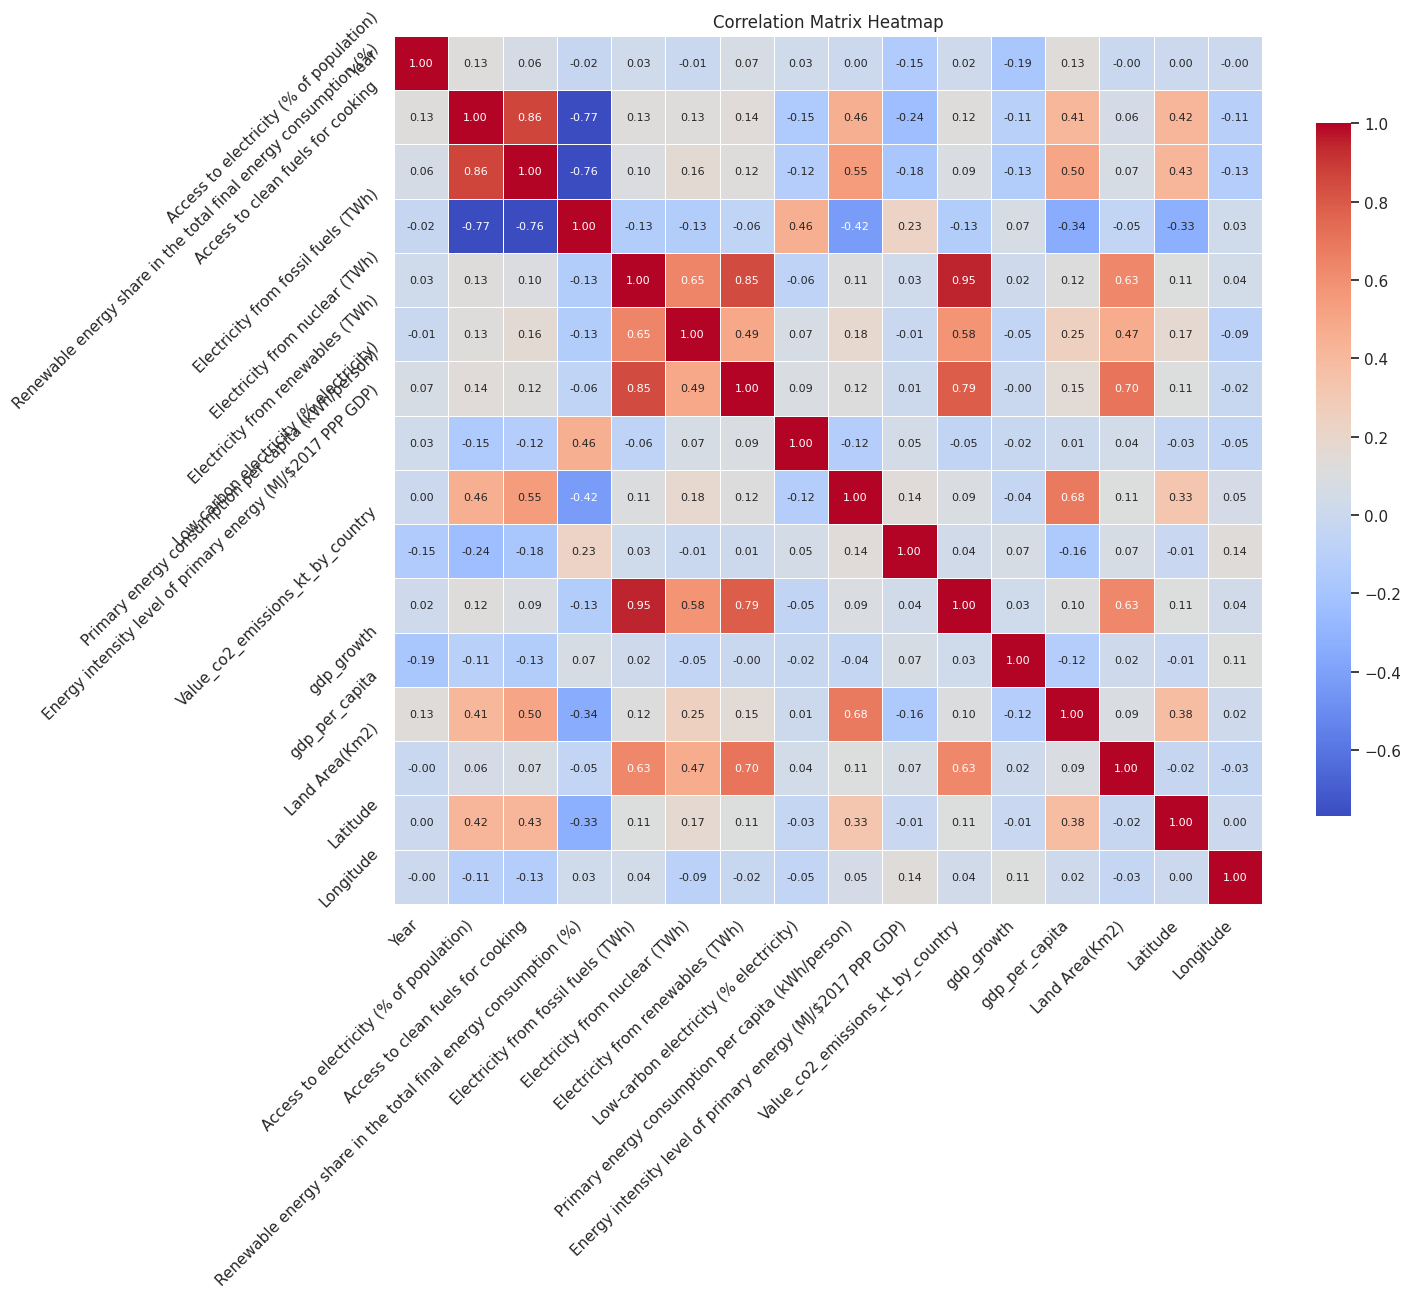

In [26]:
# Increase the figure size for a clearer heatmap
plt.figure(figsize=(14, 12))
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            cbar_kws={"shrink": .75}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
            annot_kws={"size": 8}, square=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.show()

## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #0000FF; font-size:100%; text-align:center; color: white;">7. Modeling</div>

In [27]:
# Print the column names
print(df.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')


In [28]:
# Define the ModelComparisonPlot class
class ModelComparisonPlot:
    def __init__(self, model_name):
        self.model_name = model_name
    
    def plot_comparison(self, y_val, y_pred, mse, mae, r2):
        # Create a figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=(11, 5))

        # Plot the predicted vs true values
        sns.regplot(x=y_val, y=y_pred, color='blue', scatter_kws={'alpha':0.5}, ax=axes[0])
        axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
        axes[0].set_xlabel('True values', fontsize=12)
        axes[0].set_ylabel('Predicted values', fontsize=12)
        axes[0].set_title('Predicted vs true values')
        axes[0].grid(color='lightgray', linestyle='--', linewidth=0.5)

        # Plot the residuals vs predicted values
        residuals = y_val - y_pred
        sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha':0.5}, ax=axes[1])
        axes[1].plot([y_val.min(), y_val.max()], [0, 0], 'k--', lw=2)
        axes[1].set_xlabel('Predicted values', fontsize=12)
        axes[1].set_ylabel('Residuals', fontsize=12)
        axes[1].set_title('Residual plot', fontsize=15)
        axes[1].grid(color='lightgray', linestyle='--', linewidth=0.5)

        # Add a title to the figure
        fig.suptitle('Comparison of Predicted vs True Values and Residual Plot\n{}'.format(self.model_name), fontsize=15)

        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.4)

        # Display the figure with the title
        plt.show()

In [29]:
# Assuming 'Entity' is a categorical variable
X_encoded = pd.get_dummies(df, columns=['Entity'], drop_first=True)

In [30]:
# Assuming 'gdp_growth' is target variable
X = X_encoded.drop('gdp_growth', axis=1)
y = X_encoded['gdp_growth']
X_encoded = X_encoded.fillna(0)  # Replace with your preferred imputation method

In [31]:
# Assuming X and y are features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Create an Extra Trees Regressor model
model_ETR = ExtraTreesRegressor(
    max_depth=None,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300
)

# Fit the model
model_ETR.fit(X_train, y_train)

# Make predictions
y_pred = model_ETR.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Model: {type(model_ETR).__name__}, mse: {mse}")
print(f"Model: {type(model_ETR).__name__}, mae: {mae}")
print(f"Model: {type(model_ETR).__name__}, r2: {r2}")

Model: ExtraTreesRegressor, mse: 17.64133914202548
Model: ExtraTreesRegressor, mae: 2.0542483352852656
Model: ExtraTreesRegressor, r2: 0.24953394913566718


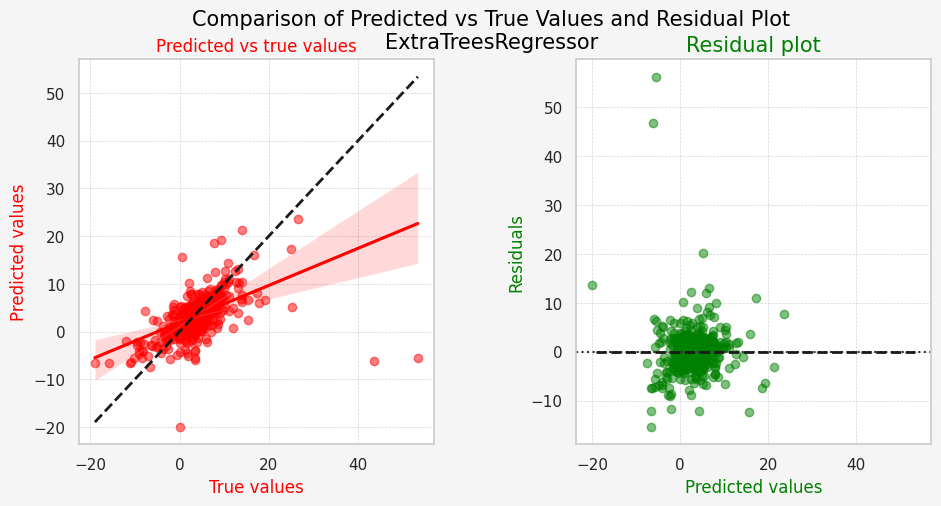

In [33]:
model_ETR_plot = ModelComparisonPlot('ExtraTreesRegressor')

# Set Seaborn style
sns.set(style="whitegrid", rc={"axes.facecolor": "white", "grid.color": "#D3D3D3"})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(11, 5), facecolor="#F5F5F5")
# Plot the predicted vs true values
sns.regplot(x=y_test, y=y_pred, color='red', scatter_kws={'alpha': 0.5}, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Remove color argument here
axes[0].set_xlabel('True values', fontsize=12, color="red")
axes[0].set_ylabel('Predicted values', fontsize=12, color="red")
axes[0].set_title('Predicted vs true values', color="red")
axes[0].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Plot the residuals vs predicted values
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, color='green', scatter_kws={'alpha': 0.5}, ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2)  # Remove color argument here
axes[1].set_xlabel('Predicted values', fontsize=12, color="green")
axes[1].set_ylabel('Residuals', fontsize=12, color="green")
axes[1].set_title('Residual plot', fontsize=15, color="green")
axes[1].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Add a title to the figure
fig.suptitle('Comparison of Predicted vs True Values and Residual Plot\n{}'.format(model_ETR_plot.model_name), fontsize=15, color="black")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the figure with the title
plt.show()

In [34]:
# Create a decision tree regression model
dt_model = DecisionTreeRegressor()
# Fit the model
dt_model.fit(X_train, y_train)
# Make predictions
predictions = dt_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
# Print evaluation metrics
print(f"Model: {type(dt_model).__name__}, mse: {mse}")
print(f"Model: {type(dt_model).__name__}, mae: {mae}")
print(f"Model: {type(dt_model).__name__}, r2: {r2}")

Model: DecisionTreeRegressor, mse: 30.467208476799588
Model: DecisionTreeRegressor, mae: 2.8568274501011786
Model: DecisionTreeRegressor, r2: -0.2960810651826131


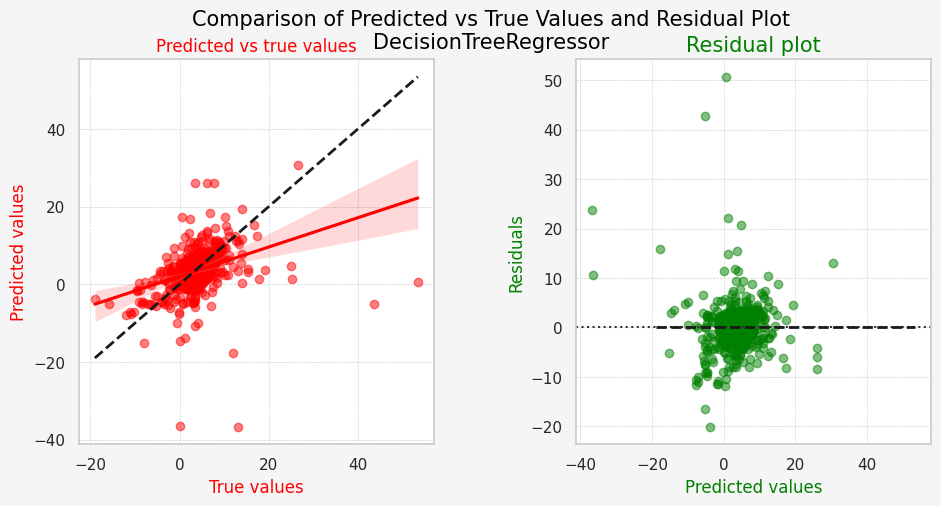

In [35]:
dt_model_plot = ModelComparisonPlot('DecisionTreeRegressor')

# Set Seaborn style
sns.set(style="whitegrid", rc={"axes.facecolor": "white", "grid.color": "#D3D3D3"})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(11, 5), facecolor="#F5F5F5")
# Plot the predicted vs true values
sns.regplot(x=y_test, y=predictions, color='red', scatter_kws={'alpha': 0.5}, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Remove color argument here
axes[0].set_xlabel('True values', fontsize=12, color="red")
axes[0].set_ylabel('Predicted values', fontsize=12, color="red")
axes[0].set_title('Predicted vs true values', color="red")
axes[0].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Plot the residuals vs predicted values
residuals = y_test - predictions
sns.residplot(x=predictions, y=residuals, color='green', scatter_kws={'alpha': 0.5}, ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2)  # Remove color argument here
axes[1].set_xlabel('Predicted values', fontsize=12, color="green")
axes[1].set_ylabel('Residuals', fontsize=12, color="green")
axes[1].set_title('Residual plot', fontsize=15, color="green")
axes[1].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Add a title to the figure
fig.suptitle('Comparison of Predicted vs True Values and Residual Plot\n{}'.format(dt_model_plot.model_name), fontsize=15, color="black")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the figure with the title
plt.show()

In [36]:
# Create a linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)

# Make predictions
predictions_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, predictions_linear)
mae_linear = mean_absolute_error(y_test, predictions_linear)
r2_linear = r2_score(y_test, predictions_linear)

# Print evaluation metrics
print(f"Model: {type(linear_model).__name__}, mse: {mse_linear}")
print(f"Model: {type(linear_model).__name__}, mae: {mae_linear}")
print(f"Model: {type(linear_model).__name__}, r2: {r2_linear}")

Model: LinearRegression, mse: 20.87834714056726
Model: LinearRegression, mae: 2.7706510531952895
Model: LinearRegression, r2: 0.11183098964236682


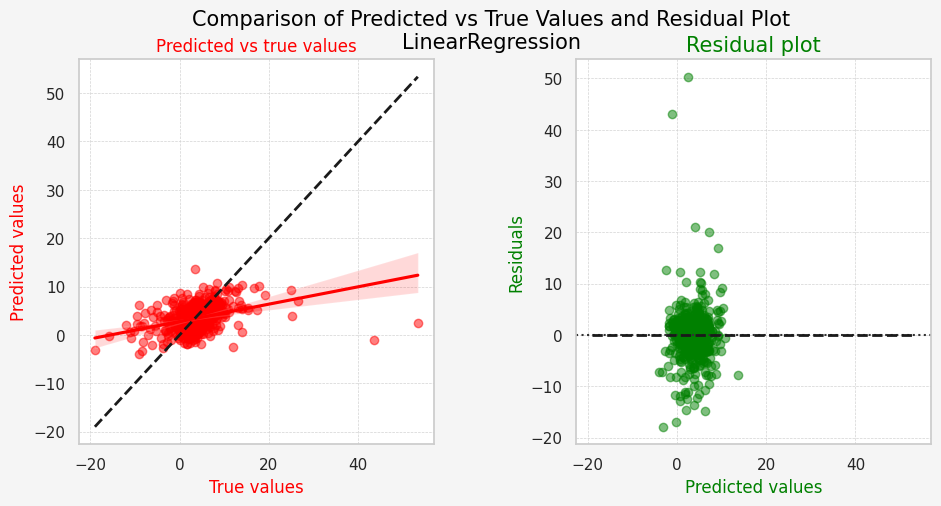

In [37]:
linear_model_plot = ModelComparisonPlot('LinearRegression')

# Set Seaborn style
sns.set(style="whitegrid", rc={"axes.facecolor": "white", "grid.color": "#D3D3D3"})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(11, 5), facecolor="#F5F5F5")
# Plot the predicted vs true values
sns.regplot(x=y_test, y=predictions_linear, color='red', scatter_kws={'alpha': 0.5}, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Remove color argument here
axes[0].set_xlabel('True values', fontsize=12, color="red")
axes[0].set_ylabel('Predicted values', fontsize=12, color="red")
axes[0].set_title('Predicted vs true values', color="red")
axes[0].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Plot the residuals vs predicted values
residuals_linear = y_test - predictions_linear
sns.residplot(x=predictions_linear, y=residuals_linear, color='green', scatter_kws={'alpha': 0.5}, ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2)  # Remove color argument here
axes[1].set_xlabel('Predicted values', fontsize=12, color="green")
axes[1].set_ylabel('Residuals', fontsize=12, color="green")
axes[1].set_title('Residual plot', fontsize=15, color="green")
axes[1].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Add a title to the figure
fig.suptitle('Comparison of Predicted vs True Values and Residual Plot\n{}'.format(linear_model_plot.model_name), fontsize=15, color="black")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the figure with the title
plt.show()

In [38]:
# Create a KNN regression model
knn_model = KNeighborsRegressor()

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
predictions_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, predictions_knn)
mae_knn = mean_absolute_error(y_test, predictions_knn)
r2_knn = r2_score(y_test, predictions_knn)

# Print evaluation metrics
print(f"Model: {type(knn_model).__name__}, mse: {mse_knn}")
print(f"Model: {type(knn_model).__name__}, mae: {mae_knn}")
print(f"Model: {type(knn_model).__name__}, r2: {r2_knn}")

Model: KNeighborsRegressor, mse: 19.653237442781666
Model: KNeighborsRegressor, mae: 2.5499412316749046
Model: KNeighborsRegressor, r2: 0.16394739811742054


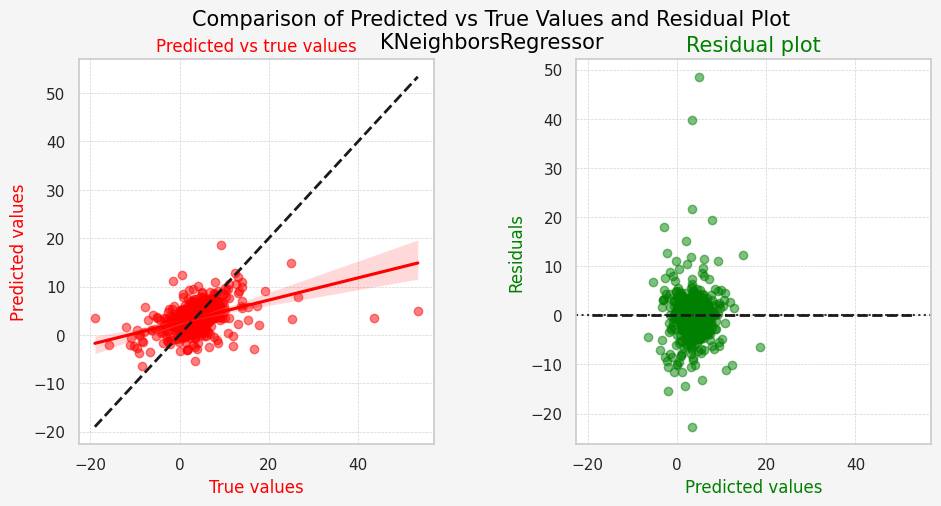

In [39]:
knn_model_plot = ModelComparisonPlot('KNeighborsRegressor')

# Set Seaborn style
sns.set(style="whitegrid", rc={"axes.facecolor": "white", "grid.color": "#D3D3D3"})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(11, 5), facecolor="#F5F5F5")
# Plot the predicted vs true values
sns.regplot(x=y_test, y=predictions_knn, color='red', scatter_kws={'alpha': 0.5}, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Remove color argument here
axes[0].set_xlabel('True values', fontsize=12, color="red")
axes[0].set_ylabel('Predicted values', fontsize=12, color="red")
axes[0].set_title('Predicted vs true values', color="red")
axes[0].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Plot the residuals vs predicted values
residuals_knn = y_test - predictions_knn
sns.residplot(x=predictions_knn, y=residuals_knn, color='green', scatter_kws={'alpha': 0.5}, ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2)  # Remove color argument here
axes[1].set_xlabel('Predicted values', fontsize=12, color="green")
axes[1].set_ylabel('Residuals', fontsize=12, color="green")
axes[1].set_title('Residual plot', fontsize=15, color="green")
axes[1].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Add a title to the figure
fig.suptitle('Comparison of Predicted vs True Values and Residual Plot\n{}'.format(knn_model_plot.model_name), fontsize=15, color="black")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the figure with the title
plt.show()

In [40]:
# Convert 'Density' column to numeric
X_train['Density'] = pd.to_numeric(X_train['Density'], errors='coerce')
X_test['Density'] = pd.to_numeric(X_test['Density'], errors='coerce')

# Drop rows with missing values after conversion
X_train = X_train.dropna()
X_test = X_test.dropna()

# Create an XGBoost regression model
xgb_model = XGBRegressor()

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
predictions_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, predictions_xgb)
mae_xgb = mean_absolute_error(y_test, predictions_xgb)
r2_xgb = r2_score(y_test, predictions_xgb)

# Print evaluation metrics
print(f"Model: {type(xgb_model).__name__}, mse: {mse_xgb}")
print(f"Model: {type(xgb_model).__name__}, mae: {mae_xgb}")
print(f"Model: {type(xgb_model).__name__}, r2: {r2_xgb}")

Model: XGBRegressor, mse: 17.44114896813245
Model: XGBRegressor, mae: 2.2334836477305084
Model: XGBRegressor, r2: 0.2580500786660753


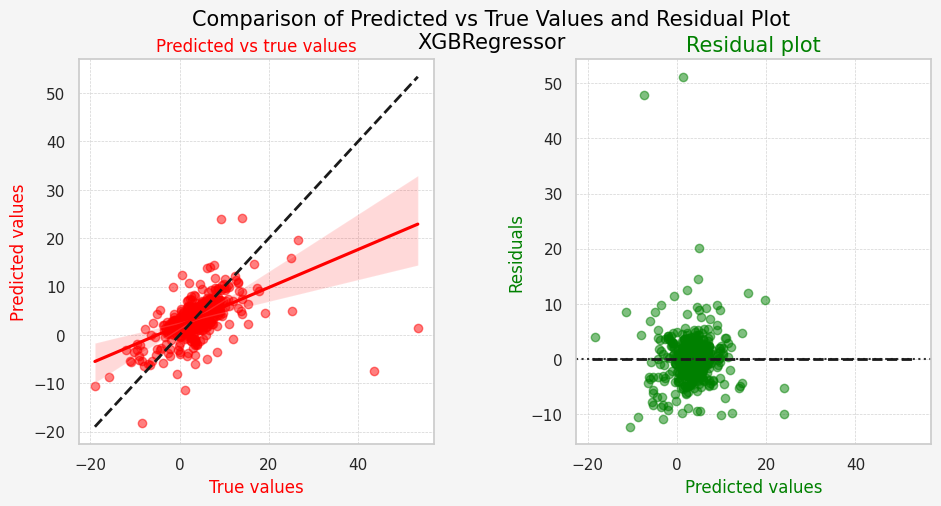

In [41]:
xgb_model_plot = ModelComparisonPlot('XGBRegressor')

# Set Seaborn style
sns.set(style="whitegrid", rc={"axes.facecolor": "white", "grid.color": "#D3D3D3"})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(11, 5), facecolor="#F5F5F5")
# Plot the predicted vs true values
sns.regplot(x=y_test, y=predictions_xgb, color='red', scatter_kws={'alpha': 0.5}, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Remove color argument here
axes[0].set_xlabel('True values', fontsize=12, color="red")
axes[0].set_ylabel('Predicted values', fontsize=12, color="red")
axes[0].set_title('Predicted vs true values', color="red")
axes[0].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Plot the residuals vs predicted values
residuals_xgb = y_test - predictions_xgb
sns.residplot(x=predictions_xgb, y=residuals_xgb, color='green', scatter_kws={'alpha': 0.5}, ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2)  # Remove color argument here
axes[1].set_xlabel('Predicted values', fontsize=12, color="green")
axes[1].set_ylabel('Residuals', fontsize=12, color="green")
axes[1].set_title('Residual plot', fontsize=15, color="green")
axes[1].grid(color='lightgray', linestyle='--', linewidth=0.5)

# Add a title to the figure
fig.suptitle('Comparison of Predicted vs True Values and Residual Plot\n{}'.format(xgb_model_plot.model_name), fontsize=15, color="black")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the figure with the title
plt.show()

In [42]:
# Convert continuous labels to binary categories
y_train_binary = (y_train > y_train.mean()).astype(int)
y_test_binary = (y_test > y_train.mean()).astype(int)
# Create a Naive Bayes model
nb_model = GaussianNB()
# Fit the model
nb_model.fit(X_train, y_train_binary)
# Make predictions
predictions = nb_model.predict(X_test)

In [43]:
X_encoded['Density'] = pd.to_numeric(X_encoded['Density'], errors='coerce')

# Drop 'gdp_growth' as before
X = X_encoded.drop('gdp_growth', axis=1)
y = X_encoded['gdp_growth']
X_encoded = X_encoded.fillna(0)

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of algorithms to check
algorithms = [
    LinearRegression(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    XGBRegressor()
]

best_mse = float('inf')
best_model = None

# Loop through each algorithm
for model in algorithms:
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model using cross-validation with mean squared error
    mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    
    # Print the cross-validation mean squared error
    print(f"{model.__class__.__name__} - Cross-Validation MSE: {mean_mse}")

    # Update the best model if the current model has lower mean squared error
    if mean_mse < best_mse:
        best_mse = mean_mse
        best_model = model

# Print the best model and its mean squared error
print("\nBest Model:")
print(best_model)
print("Best Cross-Validation MSE:", best_mse)

LinearRegression - Cross-Validation MSE: 47.287839354414366
DecisionTreeRegressor - Cross-Validation MSE: 72.96832050414909
KNeighborsRegressor - Cross-Validation MSE: 45.50437857236669
XGBRegressor - Cross-Validation MSE: 33.304067508732494

Best Model:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...

In [44]:
X_encoded['Density'] = pd.to_numeric(X_encoded['Density'], errors='coerce')

# Drop 'gdp_growth' as before
X = X_encoded.drop('gdp_growth', axis=1)
y = X_encoded['gdp_growth']
X_encoded = X_encoded.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regression model
xgb_model = XGBRegressor()
# Fit the model
xgb_model.fit(X_train, y_train)
# Make predictions
predictions = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)  # Add this line for MAE
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")  # Print MAE
print(f"R-squared: {r2}")

Mean Squared Error: 17.44114896813245
Mean Absolute Error: 2.2334836477305084
R-squared: 0.2580500786660753


In [45]:
df['Density'] = pd.to_numeric(df['Density'], errors='coerce')

# Drop 'gdp_growth' as before
project_X = df.drop('gdp_growth', axis=1)
project_y = df['gdp_growth']

# One-hot encode categorical columns
project_X_encoded = pd.get_dummies(project_X, drop_first=True)
project_X_encoded = project_X_encoded.fillna(0)

# Make predictions on the project data
project_predictions = xgb_model.predict(project_X_encoded)

# Evaluate the accuracy of the predictions
project_mse = mean_squared_error(project_y, project_predictions)
project_mae = mean_absolute_error(project_y, project_predictions)  # Add this line for MAE
project_r2 = r2_score(project_y, project_predictions)

print(f"Project Mean Squared Error: {project_mse}")
print(f"Project Mean Absolute Error: {project_mae}")  # Print MAE
print(f"Project R-squared: {project_r2}")

Project Mean Squared Error: 4.884901619925529
Project Mean Absolute Error: 1.1880334273382482
Project R-squared: 0.8335278183307918


In [46]:
def improve_model(X, y, model, max_iterations=10):
    """
    Function to iteratively improve the model's performance.

    Parameters:
    - X: Features DataFrame
    - y: Target Series
    - model: Machine learning model
    - max_iterations: Maximum number of iterations

    Returns:
    - Improved model
    """

    current_r2 = 0
    iteration = 0

    while iteration < max_iterations:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = model.predict(X_test)

        # Evaluate the model
        current_r2 = r2_score(y_test, predictions)
        print(f"Iteration {iteration + 1} - R-squared: {current_r2}")

        # Increment iteration counter
        iteration += 1

    return model

# Example usage:
improved_xgb_model = improve_model(project_X_encoded, project_y, XGBRegressor(), max_iterations=10)

Iteration 1 - R-squared: 0.2580500786660753
Iteration 2 - R-squared: 0.2580500786660753
Iteration 3 - R-squared: 0.2580500786660753
Iteration 4 - R-squared: 0.2580500786660753
Iteration 5 - R-squared: 0.2580500786660753
Iteration 6 - R-squared: 0.2580500786660753
Iteration 7 - R-squared: 0.2580500786660753
Iteration 8 - R-squared: 0.2580500786660753
Iteration 9 - R-squared: 0.2580500786660753
Iteration 10 - R-squared: 0.2580500786660753


In [47]:
def improve_model(X, y, model, max_iterations=10):
    """
    Function to iteratively improve the model's performance using GridSearchCV.

    Parameters:
    - X: Features DataFrame
    - y: Target Series
    - model: Machine learning model
    - max_iterations: Maximum number of iterations

    Returns:
    - Improved model
    """

    iteration = 0

    while iteration < max_iterations:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Hyperparameter tuning using GridSearchCV
        param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}
        grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
        grid_search.fit(X_train, y_train)

        # Use the best parameters found by GridSearchCV
        model.set_params(**grid_search.best_params_)

        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = model.predict(X_test)

        # Evaluate the model
        current_r2 = r2_score(y_test, predictions)
        print(f"Iteration {iteration + 1} - R-squared: {current_r2}")

        # Increment iteration counter
        iteration += 1

    return model

# Example usage:
improved_xgb_model = improve_model(project_X_encoded, project_y, XGBRegressor(), max_iterations=10)

Iteration 1 - R-squared: 0.2804680425876924
Iteration 2 - R-squared: 0.2804680425876924
Iteration 3 - R-squared: 0.2804680425876924
Iteration 4 - R-squared: 0.2804680425876924
Iteration 5 - R-squared: 0.2804680425876924
Iteration 6 - R-squared: 0.2804680425876924
Iteration 7 - R-squared: 0.2804680425876924
Iteration 8 - R-squared: 0.2804680425876924
Iteration 9 - R-squared: 0.2804680425876924
Iteration 10 - R-squared: 0.2804680425876924


In [48]:
def improve_model(X, y, model, target_r2=0.98, max_iterations=10):
    """
    Function to iteratively improve the model's performance using GridSearchCV.

    Parameters:
    - X: Features DataFrame
    - y: Target Series
    - model: Machine learning model
    - target_r2: Target R-squared value
    - max_iterations: Maximum number of iterations

    Returns:
    - Improved model
    """

    current_r2 = 0
    iteration = 0

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    while current_r2 < target_r2 and iteration < max_iterations:
        # Hyperparameter tuning using GridSearchCV
        param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}
        grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
        grid_search.fit(X_train_scaled, y_train)

        # Use the best parameters found by GridSearchCV
        model.set_params(**grid_search.best_params_)

        # Fit the model
        model.fit(X_train_scaled, y_train)

        # Make predictions on the test set
        predictions = model.predict(X_test_scaled)

        # Evaluate the model
        current_r2 = r2_score(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        print(f"Iteration {iteration + 1} - R-squared: {current_r2}, MAE: {mae}")

        # Increment iteration counter
        iteration += 1

    return model
df['Density'] = pd.to_numeric(df['Density'], errors='coerce')

# Drop 'gdp_growth' as before
project_X = df.drop('gdp_growth', axis=1)
project_y = df['gdp_growth']

# One-hot encode categorical columns
project_X_encoded = pd.get_dummies(project_X, drop_first=True)
project_X_encoded = project_X_encoded.fillna(0)

# Example usage:
improved_xgb_model = improve_model(project_X_encoded, project_y, XGBRegressor(), target_r2=0.98)
project_predictions = improved_xgb_model.predict(project_X_encoded)

# Evaluate the accuracy of the predictions
project_mse = mean_squared_error(project_y, project_predictions)
project_r2 = r2_score(project_y, project_predictions)
project_mae = mean_absolute_error(project_y, project_predictions)

print(f"Improved Project MAE: {project_mae}")
print(f"Project Mean Squared Error: {project_mse}")
print(f"Improved Project R-squared: {project_r2}")

Iteration 1 - R-squared: 0.2804680425876924, MAE: 2.239095940159224
Iteration 2 - R-squared: 0.2804680425876924, MAE: 2.239095940159224
Iteration 3 - R-squared: 0.2804680425876924, MAE: 2.239095940159224
Iteration 4 - R-squared: 0.2804680425876924, MAE: 2.239095940159224
Iteration 5 - R-squared: 0.2804680425876924, MAE: 2.239095940159224
Iteration 6 - R-squared: 0.2804680425876924, MAE: 2.239095940159224
Iteration 7 - R-squared: 0.2804680425876924, MAE: 2.239095940159224
Iteration 8 - R-squared: 0.2804680425876924, MAE: 2.239095940159224
Iteration 9 - R-squared: 0.2804680425876924, MAE: 2.239095940159224
Iteration 10 - R-squared: 0.2804680425876924, MAE: 2.239095940159224
Improved Project MAE: 9.053771487174895
Project Mean Squared Error: 106.77779983498002
Improved Project R-squared: -2.6388723203473923


In [49]:
df['Density'] = pd.to_numeric(df['Density'], errors='coerce')

# Drop 'gdp_growth' as before
project_X = df.drop('gdp_growth', axis=1)
project_y = df['gdp_growth']

# One-hot encode categorical columns
project_X_encoded = pd.get_dummies(project_X, drop_first=True)
project_X_encoded = project_X_encoded.fillna(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(project_X_encoded, project_y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor with increased complexity
rf_model = RandomForestRegressor(n_estimators=300, max_depth=5, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)  # Add this line for MAE
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")  # Print MAE
print(f"R-squared: {r2}")

Mean Squared Error: 19.28589762082216
Mean Absolute Error: 2.463386354467384
R-squared: 0.179574106684824


#### <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: darkred; font-size:100%; text-align:left; color: white;">Analysis:</div> <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: darkred; font-size:100%; text-align:left; color: white;">Elevated values of Mean Squared Error (MSE) and Mean Absolute Error (MAE) imply notable disparities between the model's predictions and the actual data. The R-squared value, standing at 0.18, signifies that the model elucidates only a modest portion of the variability in the target variable. This observation hints at potential enhancements in capturing the intricate patterns inherent in the dataset.</div>

#### <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: darkred; font-size:100%; text-align:left; color: white;">Recommendations:</div> <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: darkred; font-size:100%; text-align:left; color: white;">Tailored to the unique intricacies of your problem and dataset, it may be beneficial to delve into additional model refinement, feature engineering, or explore alternative algorithms to enhance the model's predictive prowess. It is crucial to recognize that the interpretation of these metrics must align with the specific context of your data and the intricacies of the problem at hand.</div>

## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: Yellow; font-size:100%; text-align:center; color: red;">The End</div>